In [1]:
import numpy as np
import pandas as pd
import time

In [59]:
from tqdm.notebook import tqdm

In [60]:
tqdm.pandas()

C:\Users\HWer\Anaconda3\envs\ml_project\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
from module.data.read_data import *

In [3]:
train = sales_file_processing()

In [4]:
test = test_file_processing().set_index('ID')

In [5]:
shops_count = test.shop_id.unique().shape[0]
items_count = test.item_id.unique().shape[0]

In [6]:
print(shops_count)
print(items_count)
print(shops_count * items_count)
print(test.shape)

42
5100
214200
(214200, 3)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [8]:
train['date_block_num'] = train['date_block_num'].astype(np.uint8)
train['shop_id'] = train['shop_id'].astype(np.uint8)
train['item_id'] = train['item_id'].astype(np.uint16)
train['item_price'] = train['item_price'].astype(np.float16)
train['item_cnt_day'] = train['item_cnt_day'].astype(np.float16)

In [9]:
ts = time.time()
cols = ['date_block_num','shop_id','item_id']
train = train.groupby(cols).agg({'item_cnt_day': ['sum']})

new_columns = ['item_cnt_month']
train.columns = new_columns
train.reset_index(inplace=True)
train[new_columns] = train[new_columns].astype(np.float16)

time.time() - ts

1.0728211402893066

In [10]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.uint8)
test['shop_id'] = test['shop_id'].astype(np.uint8)
test['item_id'] = test['item_id'].astype(np.uint16)

In [53]:
ts = time.time()
columns = ['date_block_num', 'shop_id', 'item_id']
matrix = pd.concat([train, test], ignore_index=True, sort=False, keys=columns)
matrix.fillna(0, inplace=True) # 34 month
matrix.sort_values(by=columns, inplace=True)
matrix.reset_index(drop=True, inplace=True) 
time.time() - ts

0.592414379119873

In [54]:
matrix['date_block_num'] = matrix['date_block_num'].astype(np.uint8)
matrix['shop_id'] = matrix['shop_id'].astype(np.uint8)
matrix['item_id'] = matrix['item_id'].astype(np.uint16)
matrix['item_cnt_month'] = matrix['item_cnt_month'].astype(np.float16)

In [55]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822472 entries, 0 to 1822471
Data columns (total 4 columns):
date_block_num    uint8
shop_id           uint8
item_id           uint16
item_cnt_month    float16
dtypes: float16(1), uint16(1), uint8(2)
memory usage: 10.4 MB


In [56]:
matrix['previous_block_num'] = 0
matrix['previous_block_num'] = matrix['previous_block_num'].astype(np.uint8)

In [57]:
matrix['block_num_diff'] = 0
matrix['block_num_diff'] = matrix['block_num_diff'].astype(np.uint8)

In [58]:
_grouped = matrix.groupby(['shop_id', 'item_id'])

In [61]:
matrix['previous_block_num'] = _grouped['date_block_num'].progress_apply(lambda x: x.shift(periods=1, fill_value=0))

In [62]:
matrix['previous_sales'] = _grouped['item_cnt_month'].progress_apply(lambda x: x.shift(periods=1, fill_value=0))

In [63]:
matrix['block_num_diff'] = matrix['date_block_num'] - matrix['previous_block_num']

In [64]:
matrix.shape

(1822472, 7)

In [51]:
matrix = matrix[matrix.block_num_diff.isin([0, 1])]

In [52]:
matrix.shape

(805091, 7)

In [33]:
ts = time.time()
_filtered = _grouped['date_block_num'].filter(lambda x: x.count() > 3)

time.time() - ts

58.03832411766052

In [68]:
counted = matrix.groupby(['shop_id', 'item_id'])['date_block_num'].count()

In [71]:
matrix[(matrix['shop_id'] == 28) & (matrix['item_id'] == 20949)]

,date_block_num,shop_id,item_id,item_cnt_month,previous_block_num,block_num_diff,previous_sales
210755,3,28,20949,7.0,0,3,0.0
264523,4,28,20949,504.0,3,1,7.0
319094,5,28,20949,634.0,4,1,504.0
377258,6,28,20949,540.0,5,1,634.0
435137,7,28,20949,641.0,6,1,540.0
490170,8,28,20949,584.0,7,1,641.0
542043,9,28,20949,430.0,8,1,584.0
592752,10,28,20949,568.0,9,1,430.0
651307,11,28,20949,759.0,10,1,568.0
711326,12,28,20949,552.0,11,1,759.0


In [69]:
filtered.shape

(137895,)

In [70]:
filtered.describe()

count    137895.000000
mean          5.068995
std           4.603767
min           2.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          35.000000
Name: date_block_num, dtype: float64

In [34]:
xs = [i for i in range(34)]

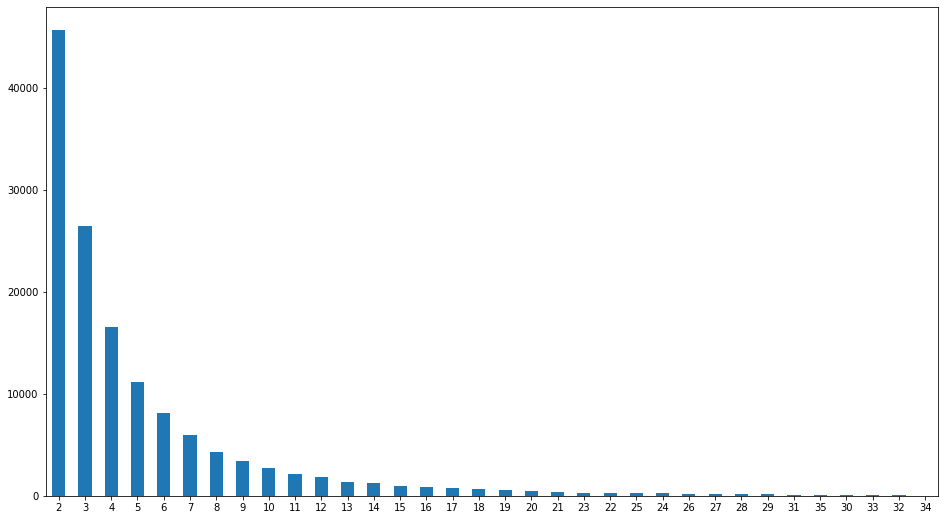

In [66]:
pd.value_counts(filtered).plot.bar(figsize=(16, 9), x=xs, xticks=xs, rot=0)

In [63]:
counted

date  date_block_num  item_price  item_cnt_day  \
shop_id item_id                                                   
2       27          1               1           1             1   
        30          1               1           1             1   
        31          7               7           7             7   
        32          4               4           4             4   
        33          5               5           5             5   
...               ...             ...         ...           ...   
59      22151       2               2           2             2   
        22154       1               1           1             1   
        22162      14              14          14            14   
        22164       4               4           4             4   
        22167       1               1           1             1   

                 previous_block_num  block_num_diff  
shop_id item_id                                      
2       27                        1               1  
        30                        1               1  
        31                        7               7  
        32                        4               4  
        33                        5               5  
...                             ...             ...  
59      22151                     2               2  
        22154                     1               1  
        22162                    14              14  
        22164                     4               4  
        22167                     1               1  

[271658 rows x 6 columns]

In [34]:
_filtered

1           0
7           0
8           0
9           0
10          0
           ..
3150036    34
3150042    34
3150044    34
3150046    34
3150048    34
Name: date_block_num, Length: 2649793, dtype: uint8